In [27]:
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt

In [28]:
SRC = "./Results/All_results/D3_C1_Summary.txt"
DST = "/home/dengarden/Dropbox/KRAS_drug_resistance/KRAS NGS/Read Analysis/All_results/D3_C1_Summary.txt"

In [29]:
src = pd.read_csv(SRC, sep=':', header=None, index_col=0)
dst = pd.read_csv(DST, sep=':', header=None, index_col=0)

In [30]:
src.head()

,1
0,
Frag1_Pos_7_V_F,0
Frag1_Pos_7_V_Y,1
Frag1_Pos_7_V_C,0
Frag1_Pos_7_V_*,0
Frag1_Pos_7_V_W,0


In [31]:
dst.head()

,1
0,
Frag1_Pos_1_M_F,303
Frag1_Pos_1_M_Y,133
Frag1_Pos_1_M_C,69
Frag1_Pos_1_M_*,383
Frag1_Pos_1_M_W,247


In [32]:
joined = pd.merge(src, dst, left_index=True, right_index=True, how='left')


In [33]:
joined.columns = ["FOCUSED_EXTRACTION", "WHOLE_EXTRACTION"]

In [34]:
joined.head()
joined.to_csv(f"{SRC.split('/')[-1]}_vs_{DST.split('/')[-1]}.csv")

In [41]:
# Remove outliers for better visualization
joined = joined[(joined[joined.columns[1]]<=joined[joined.columns[1]].mean() + 1.96 * joined[joined.columns[1]].std())]

In [42]:
normalized_joined = (joined-joined.mean())/joined.std()
normalized_joined.to_csv(f"{SRC.split('/')[-1]}_vs_{DST.split('/')[-1]}_normalized.csv")

In [45]:
l = list(normalized_joined.index)

TypeError: list indices must be integers or slices, not str

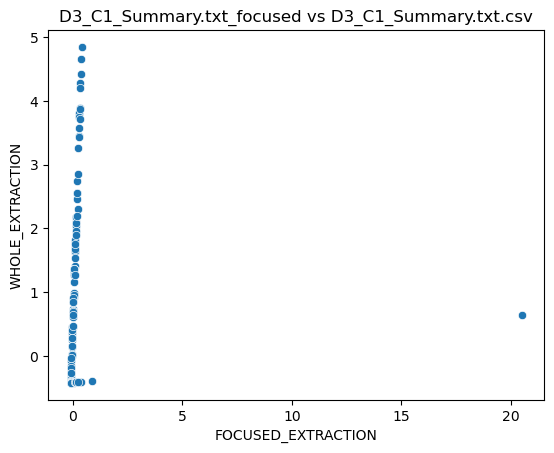

In [47]:
sns.scatterplot(normalized_joined, x=f'{normalized_joined.columns[0]}', y=f'{normalized_joined.columns[1]}')
plt.title(f"{SRC.split('/')[-1]}_focused vs {DST.split('/')[-1]}.csv")

for idx, row in normalized_joined.iterrows():
    plt.text(row[0]+ 0.2 , row[1], l[idx], horizontalalignment='left', size='medium', color='black')
